manuscript nist (dataset per character recognition)

usiamo un metodo grey box per popolare una matrice che poi funzioni come black box
es. usiamo dei valori chimico fisici sulle molecole (num elettroni o cose del genere) per popolare una matrice di features da dare poi in pasto al machine learning


reti neurali convoluzionali -> producono risultati anche saltando il processo di pre-processing

la fase di apprendimento è utile per far minimizzare l'errore per i dati che non ha mai visto

model selection -> è macchina dipendente


#### classificazione con reti neurali
costruiamo un iperpiano che ci divida correttamente i dati
il migliore iperpiano che minimizza l'errore è quello che massimizza la distanza tra i punti più vicini al piano e il piano -> regolarizzazione di tikhonov 

i kernel sono funzioni di mapping separatori lineari

#### neurone
la fi è una funzione di attivazione 

#### reti neurali
sono un aggregato aciclico di neuroni 

la rete si autocostruisce la sua rappresentazione interna, ovvero individua le fi di mapping


perchè funzionano?

sergiodecherchi@iit.it

C:\Users\Carlotta\Anaconda3\lib\site-packages\ipykernel\__main__.py:36: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


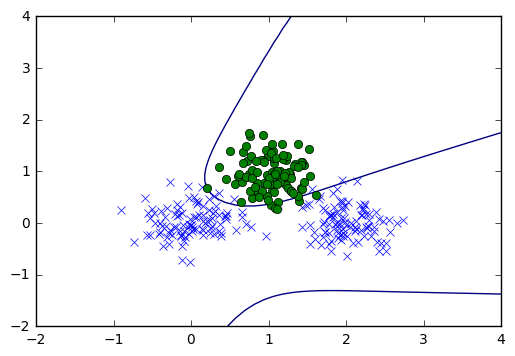

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def createTS(mingrid,maxgrid,gridSize):
	x = np.linspace(mingrid,maxgrid,gridSize)
	y = np.linspace(mingrid,maxgrid,gridSize)
	xx,yy = np.meshgrid(x,y)
	return np.column_stack((xx.flatten(),yy.flatten()))
		
def createTG(mu1,mu2,mu3,N): ##restituisce la matrice concatenata delle gaussiane in input
	cov = [[0.1,0],[0,0.1]]
	x1,y1 = np.random.multivariate_normal(mu1,cov,N).T	
	x2,y2 = np.random.multivariate_normal(mu2,cov,N).T
	x3,y3 = np.random.multivariate_normal(mu3,cov,N).T
	t1 = np.ones(2*N)
	t2 = -np.ones(N)
	X1 = np.column_stack((x1,y1))
	X2 = np.column_stack((x2,y2))
	X3 = np.column_stack((x3,y3))
	return np.concatenate((X1,X2,X3)),np.concatenate((t1,t2))

def solveELM(H,y,ll): #risoluzione della macchina
	nh = H.shape[1]
	lI = ll*np.identity(nh) #creiamo la matrice di identità
    #risolviamo linearmente
	return np.linalg.solve(np.dot(np.transpose(H),H)+lI,np.dot(np.transpose(H),y))

def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))
    
def computeHiddenLayer(X,R=[],NH=10):
    n = X.shape[0] #numero di righe
    ni = X.shape[1] #numero di colonne
    H = np.zeros((n,NH))
      
    if (R==[]): #se non abbiamo passaro la matrice randomica allora la generiamo
        R = np.random.normal(size=(ni,NH))

    H = sigmoid(np.dot(X,R))
    
    return R,H
	
def predict(H,w):
    return np.dot(H,w)
	
##################################################################

# training distribution
Ntg = 100
mu1 = [0,0]
mu2 = [2,0]
mu3 = [1,1]

# test distribution
Nts_grid = 50
mingrid = -2
maxgrid = +4

# hidden data
NH = 10
ll = 1e-3
useSamples = False

np.random.seed(5)

# create data
Xtg,y = createTG(mu1,mu2,mu3,Ntg)
Xts = createTS(mingrid,maxgrid,Nts_grid)

R = []
if (useSamples):
    R = np.copy(np.transpose(Xtg))
    NH = Ntg

# compute kernel on training
R,H = computeHiddenLayer(Xtg,R,NH)

# solve on training set 
w = solveELM(H,y,ll)

# compute hidden layer on test
_,Hts = computeHiddenLayer(Xts,R,NH)

# predict 
ypred = predict(Hts,w)

ypred_grid = ypred.reshape((Nts_grid,Nts_grid))

# visualize results
plt.plot(Xtg[0:2*Ntg,0],Xtg[0:2*Ntg,1],'x')
plt.plot(Xtg[2*Ntg:3*Ntg,0],Xtg[2*Ntg:3*Ntg,1],'o')
plt.contour(Xts[:,0].reshape(Nts_grid,Nts_grid),Xts[:,1].reshape(Nts_grid,Nts_grid),
ypred_grid,levels=[0])

plt.show()
